# Classification de textes & Word Embeddings

                                            Emanuela Boros
                                            Université de La Rochelle

# 1. Introduction

La classification des objets consiste à attribuer une classe à un objet. Ce objet peut être de type texte, image, audio ou vidéo. Nous faisons de la classification tout le temps. Par exemple, un chaffeur de voitures a besoin de reconaître tous les objets dans la rue pour pouvoir prévoir sa trajectoire. Il est importante de faire la différence entre un cycliste et un piéton, une moto et une voiture, les différents types de panneaux pour savoir où il peut aller, une personne et un policier, etc.

Pour savoir comment classifier un objet, il est important de connaître les caracteristiques qui definissent une classe. Par exemple, si on considere les caracteristiques : quantités de roues, selle, guidon, et frein. Un vélo ordinaire est composé de deux roues, une selle et un guidon. Une voiture a 4 roues, des freins mais pas de selle ni cadre ni guidon. Une moto est aussi composée de deux roues, une selle, des friens et un guidon. Avec ces caracteristiques, la moto et le vélo ont la même répresentation.

Nous pourrions compliquer encore plus cette tâche et essayer de classifier les chihuahuas ou muffins suivants. Pour faire cela, quelles sont les caracteristiques pertinentes à analyser ?

<figure>
    <center>
    <img src="images/classification.jpeg" width="400" height="600">
    <figcaption>Source: <a href="https://www.freecodecamp.org/news/chihuahua-or-muffin-my-search-for-the-best-computer-vision-api-cbda4d6b425d/">Link</a></figcaption>
    </center>
</figure>

Vous trouvez ça difficile ? Vous avez raison.

La quantité et la pertinence des caracteristiques peuvent aider à classifier des objets. Plus les caracteristiques sont indépendantes et différentes, plus on aura d'informations complementaires sur l'objet analysé.

En suivant cette méthode, nous analyserons dans ce cours la classification de textes. Il est très important de faire attention aux caracteristiques pour chaque objet (dans ce cas : les mots et leurs caractéristiques). Notre objectif est d'avoir des caracteristiques pertinentes pour mieux définir un objet et pouvoir l'attribuer à une catégorie correctement.


<figure>
    <center>
    <img src="images/text_processing_flow.png" width="700" height="100">
    <figcaption>Source: <a href="https://mlwhiz.com/blog/2019/01/17/deeplearning_nlp_preprocess/">Link</a></figcaption>
    </center>
</figure>


Dans ce cours, nous explorerons un ensemble de données, une analyse de texte et plusieurs approches basées sur l'apprentissage automatique et profond, de la manière suivante:

- **Récupération** du corpus de textes (*.csv, *.txt, *.json, etc.)
- **Prétraitement** des données textuelles (text pre-processing) : tokenisation etc
- **Exploration** du corpus (*EDA*, exploratory data analysis) : analyse des fréquences
- **Representation** des mots (bag of words, *sac de mots*, TF-IDF, plongements de mots, *word embeddings*)
- **Apprentissage automatique** (machine learning) et **apprentissage profond** (deep learning)
- **Analyse d'erreurs** (evaluation, etc.)

# 2. Récupération, Prétraitement et Exploration du corpus de textes


### 2. 1. Contexte

Le gouvernement américain a attaqué en justice cinq grands groupes américains du tabac pour avoir amassé d'importants bénéfices en mentant sur les dangers de la cigarette. Le cigarettiers  se sont entendus dès 1953, pour "mener ensemble une vaste campagne de relations publiques afin de contrer les preuves de plus en plus manifestes d'un lien entre la consommation de tabac et des maladies graves". 

Dans ce procès 6,910,192 de documents ont été collectés et numérisés. Afin de faciliter l'exploitation de ces documents par les avocats, vous êtes en charge de mettre en place une classification automatique des types de documents: **Advertisement, Email, Form, Letter, Memo, News, Note, Report, Resume, Scientific**.


<table>
  <tr>
    <td>Letter</td>
     <td>News</td>
  </tr>
  <tr>
    <td><img src="images/50661869-1869.jpg" width=270 height=480></td>
    <td><img src="images/10031617.jpg" width=270 height=480></td>
  </tr>
 </table>


Un échantillon aléatoire des documents a été collecté et des opérateurs ont classé les documents dans des répertoires correspondant aux classes de documents : lettres, rapports, notes, email, etc. Vous avez à votre disposition : 

- le texte contenu dans les documents obtenu par OCR (en anglais : optical character recognition; signifie reconnaissance optique de caractères ou reconnaissance de texte, une technologie qui permet de convertir différents types de documents tels que les documents papiers scannés en fichiers modifiables - texte); <ins>**path**</ins>
- les classes des documents définies par des opérateurs; <ins>**label**</ins>

Aprés téléchargement et extraction du fichier compressé, nous pourrons charger et regarder le structure de ces commentaires avec la bibliothèque pandas (plus d'info <a href="https://ghajba.developpez.com/tutoriels/python/analyse-donnees-avec-pandas/">ici</a>).



In [4]:
import pandas as pd # https://pandas.pydata.org/docs/

data = pd.read_csv('data/Tobacco3482-text/tobacco_texts.csv') # lire le fichier .csv

In [5]:
data.head() # afficher les 5 premières lignes

,path,label
0,Scientific/2051025161.txt,Scientific
1,Note/87705667.txt,Note
2,Scientific/50590463-0469.txt,Scientific
3,Resume/50617225-7226.txt,Resume
4,News/2078115137.txt,News


In [6]:
data.tail() # afficher les 5 dernières lignes

,path,label
691,Note/12882100.txt,Note
692,Form/2505233645_3646.txt,Form
693,Memo/2048153405_2048153423.txt,Memo
694,Scientific/50492374-2377.txt,Scientific
695,Form/2505106228.txt,Form


Avec Pandas, nous pouvons commencer avec quelques statistiques simples. Les résultats suivants seront dans l'ordre décroissant de sorte que le premier élément soit l'élément le plus fréquent.

In [7]:
data.label.value_counts()

Memo             127
Email            118
Letter           105
Form              98
Scientific        60
Report            49
News              42
Advertisement     41
Note              36
Resume            20
Name: label, dtype: int64

Avec Pandas, nous pouvons également visualiser ces statistiques.

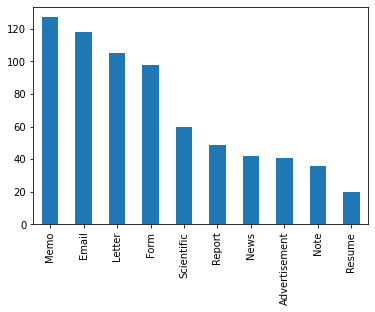

In [8]:
_ = data.label.value_counts().plot(kind='bar')

Nous avons vu que le fichier .csv contenait les chemins et les étiquettes des documents. Maintenant, nous devons lire les fichiers à partir des chemins spécifiés pour obtenir les données textuelles.

**<span style="color:red">To do</span>**:

> * Pour chaque chemin dans le dataframe, lisez le fichier associé et ajoutez les textes dans un vecteur. 


In [9]:
import os

    
texts = [] # Liste pour stocker tous les vecteurs

for idx, line in data.iterrows(): # itérer dans un dataframe Pandas
    
    #print(idx)
    #print(line[0])
    chemin_fichier = os.path.join('data/Tobacco3482-text/', line[0])
    with open(chemin_fichier, "r") as f:
        text = f.read()
    texts.append(text)
print("taille liste des vecteurs: ", len(texts))

data['text'] = texts # créer une nouvelle colonne dans le dataframe Pandas avec les textes associés

taille liste des vecteurs:  696


In [10]:
data.head() # visualisez les donnees

,path,label,text
0,Scientific/2051025161.txt,Scientific,MONTHLY SUMMARY\n\n25 JANUARY 1986-\n24 FEBRUA...
1,Note/87705667.txt,Note,2/14/90\n\n \n\nDATE:\n\n \n\n \n \n\nSUBJE...
2,Scientific/50590463-0469.txt,Scientific,"Cell, Vol. 59, 1107-1113, December 22, 1989, C..."
3,Resume/50617225-7226.txt,Resume,BIOGRAPHICAS SKETCH\n\nGive the following info...
4,News/2078115137.txt,News,"Tae NEWS & OBSERVER\n\nFaday, Ocroagr 15, 1999..."


Exemple tiré de l'ensemble de données Tobacco:

In [11]:
data['text'][0], 'Classe :', data['label'][0]

('MONTHLY SUMMARY\n\n25 JANUARY 1986-\n24 FEBRUARY 1986\n\nFOR: David Douglas\n1. Non-burning smoking article:\n\nAdditional work on this subject was done this month by examining the\nfiltration effect of a cellulose acetate filter versus no filter. The\nsample examined was an IFF tobacco neutral fraction flavor. Fifty\nmicroliters of the sample were applied to a piece of filter paper inside a\nplastic tube like those used by Flavor Development for the non-burning\nsmoking article. Thirty-five ml puffs were withdrawn alternately at one end\ncontaining a CA filter and at the other end, which was open. The results of\nchromatograms produced by samples taken in these ways showed that the later,\nmore polar, less volatile components are reduced disproportionately when\npuffed through the CA filter compared to a sample taken with no filter.\n\nThis observation could have implications for the use of tobacco-identical\nflavors in both burning and non-burning smoking products, since this flavo

Étant donné que cet ensemble de données a été numérisé, des problèmes peuvent apparaître avec les données. Il n'y a toujours pas d'outils OCR qui fonctionnent au niveau humain dans la plupart des applications. L'existence aujourd'hui de plusieurs outils de ce type a conduit peu à peu à définir des critères de choix pour sélectionner l'OCR le plus efficace et surtout le mieux adapté à son application. Longtemps, le critère d'efficacité était lié à un taux de reconnaissance élevé, pensant qu'une technologie efficace est une technologie sans défaut. En effet, il faut admettre quele taux de 100% reste un objectif à atteindre.

Les erreurs incluent une mauvaise lecture des lettres, le saut de lettres illisibles ou la combinaison de texte de colonnes adjacentes ou de légendes d'image. Bien que de nombreux facteurs affectent les performances des outils OCR, le nombre d'erreurs dépend de la qualité et de la forme du texte, y compris du font utilisé.


<figure>
    <center>
    <img src="images/1004859787.jpg" width="300" height="100">
    <figcaption>News</figcaption>
    </center>
</figure>


Un exemple d'un tel document, avec de nombreuses erreurs de reconnaissance de caractères et de mots :

In [12]:
data['text'][57], 'Classe :', data['label'][57], data['path'][57]

('”\n\n \n\n \n   \n\nB Tannen aa\nCRSBURG CAG Stee cS\n\noe oe) eee\n\n \n  \n  \n    \n  \n  \n   \n\n \n\n    \n \n\n \n\nae\n\n‘ined ae\n\ncee «eee ‘and a ohne\nsia Pos ecm se E et pur ita\n\n(par, tment. o Spur’. peusENrarceye\n“pla ae ake\n\n  \n \n   \n    \n \n  \n \n \n \n\n   \n  \n\n   \n\n \n\n \n\npe Gores. PO Fe et ree ca\nEethtut fons. “for “research ieee\nplems.. éommion\n\nuniversity: and in\n\n \n  \n\ni ee THE ‘PROGRAM I HE ‘outlined {\n\nnya\nea A os\n\n \n\n      \n  \n\n         \n   \n  \n   \n  \n \n \n \n \n    \n\n   \n  \n\n   \n    \n\n   \n\nithe “concept” of the’ land-gre as VPI wh\n! eir eatly days’ were geared. p mar 5 a pare\nte Hahn, “a ‘physicist, Thursday ¢ *\n\n“the ‘teins of the educational “iris is\n; which. he has “headed,‘since ast. ‘July. ii\n‘the “youfigest NPI president ever a:\n\nSaent in ‘the. nation’s ‘land- nt; 3\nis Engineeri g ‘students | now2ecinprise “B nae\n“and students” in the ‘non-agricultural, “an',
 'Classe :',
 'News',
 'News/1

La figure correspond au texte et il est visible que sa qualité est faible.

### 2.2 Prétraitement de texte 

Dans tout processus d'analyse de texte, la première et la plus importante des étapes est de **constituer un corpus**, un ensemble de documents, et de **le nettoyer** afin de l'exploiter. Nous allons réaliser quelques opérations statistiques pour mieux comprendre comment ils sont constitués et présenter les principes de base.

Les étapes de prétraitement (*preprocessing*) sont cruciales car elles permettent de **nettoyer le texte** de tous ses éléments qui ne sont **pas porteurs de sens**, et le préparent pour l’analyse.
Les différentes étapes sont :
1. La ***tokenisation*** est une tâche courante dans le traitement automatique du langage naturel (TALN). Les **tokens** sont les éléments constitutifs du langage naturel. La tokenisation est un moyen de séparer un morceau de texte en unités plus petites appelées **tokens**. Les **tokens** sont généralement des **mots**.

2. La ***normalisation*** de texte est le processus de transformation d'un texte en une forme canonique (standard). Par exemple, le mot «gooood» et «gud» peut être transformé en «good», sa forme canonique. La normalisation du texte est importante pour les textes bruyants tels que les commentaires sur les réseaux sociaux, les messages texte et les commentaires sur les articles de blog, et aussi pour les documents numérisés qui, comme nous l'avons vu, contiennent de nombreuses erreurs: les **abréviations**, les **fautes d'orthographe** et l'utilisation de mots hors vocabulaire (oov) sont répandus. Ce procédé implique également la **suppression des mots vides** ou des **mots bruyants** qui peuvent perturber l'analyse (conjugaisons, majuscules, ponctuations, etc.).

**Note**: en analyse de données, ces étapes sont généralement les plus fastidieuses, car elle impliquent un long travail de normalisation de données.

Tout au long de ce chapitre, nous allons utiliser les bibliothèques de traitement du langage [`nltk`](https://www.nltk.org/), [`spaCy`](https://spacy.io) ainsi que les bibliothèques scientifiques classiques que sont [`pandas`](https://pandas.pydata.org/), [`numpy`](https://numpy.org/) et [`scikit-learn`](https://scikit-learn.org).

Dans la première partie du cours, nous avons étudié la pertinence du pre-traitement du texte pour extraire les élements le plus pertinents pour décrire ce texte. Certains élements du texte ne sont pas pertinents dans la classification de spams : le masculin et feminin de mots, la conjugaison de verbes, stopwords, singulier et pluriel des mots, ... 

La bibliothèque [`spaCy`](https://spacy.io) nous permet d'obtenir ces informations facilement.

PS: l'installation de cette bibliothèque est très simple dans envirement virtuel (ou ici, dans le notebook):

```
pip install spacy
python -m spacy download en_core_web_sm```

In [13]:
!pip install spacy
!python -m spacy download en_core_web_md

Traceback (most recent call last):
  File "/home/daj/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 677, in urlopen
    chunked=chunked,
  File "/home/daj/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 381, in _make_request
    self._validate_conn(conn)
  File "/home/daj/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 978, in _validate_conn
    conn.connect()
  File "/home/daj/anaconda3/lib/python3.7/site-packages/urllib3/connection.py", line 371, in connect
    ssl_context=context,
  File "/home/daj/anaconda3/lib/python3.7/site-packages/urllib3/util/ssl_.py", line 386, in ssl_wrap_socket
    return context.wrap_socket(sock, server_hostname=server_hostname)
  File "/home/daj/anaconda3/lib/python3.7/ssl.py", line 423, in wrap_socket
    session=session
  File "/home/daj/anaconda3/lib/python3.7/ssl.py", line 870, in _create
    self.do_handshake()
  File "/home/daj/anaconda3/lib/python3.7/ssl.py", line 1139, in do_han

### 2.2.1 Suppression des [mots vides](https://fr.wikipedia.org/wiki/Mot_vide) (stopwords)

La première manipulation souvent effectuée dans le traitement du texte est la suppression des mots vides, ou *stopwords*. Ce sont les mots très courants dans la langue étudiée (« et », « à », « le »… en français) qui dans beaucoup des cas **n'apportent pas de valeur informative** pour la compréhension d’un document ou d’un corpus. 

Par exemple, dans le contexte d'un système de recherche, si votre requête de recherche est «Qu'est-ce que le prétraitement de texte ?», vous voulez que le système de recherche se concentre sur les documents qui parlent de «prétraitement de texte» plutôt que sur les documents qui parlent de «Qu'est-ce que le». Cela peut être fait en empêchant tous les mots de votre liste de mots vides d'être analysés. Les mots vides sont couramment appliqués dans les systèmes de recherche, les applications de classification de texte, la modélisation de sujets, l'extraction de sujets et autres.

Par contre, la suppression des mots vides, bien qu'efficace dans les systèmes de recherche et d'extraction de sujets, s'est avérée non critique dans les algorithmes de classification and ils sont assez importants dans la création d'un [**modèle de langage**](https://medium.com/@pierre_guillou/nlp-fastai-gpt-2-16ee145a4a28) dans lequel le sens d'un mot dépend de tous les mots environnants. Cependant, cela aide à réduire le nombre de fonctionnalités prises en compte, ce qui permet de garder vos modèles de taille décente.

In [14]:
import spacy
import string

import en_core_web_sm

nlp = spacy.load('en_core_web_sm') # charge le modèle en anglais



spacy_stopwords = list(spacy.lang.en.stop_words.STOP_WORDS) # la liste des mots vides de SpaCy

punctuation = list(string.punctuation) # une liste avec ponctuations

spacy_stopwords[:10], punctuation[:10]

(["'d",
  'third',
  'thereafter',
  'very',
  'themselves',
  'move',
  'was',
  'whoever',
  'everywhere',
  'wherein'],
 ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*'])

Voici un exemple du fonctionnement de spaCy. Vous pouvez trouver plus de détails ici [`spaCy 101`](https://spacy.io/usage/spacy-101)

In [15]:
doc = nlp('Apple is looking at buying U.K. startup for $1 billion.')

for token in doc:
    #print(token.tag_)
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP compound X.X. False False
startup startup NOUN NN dobj xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False
. . PUNCT . punct . False False


Ensuite, nous créons une fonction pour prétraiter tous les documents dans le dataframe Pandas. 


In [16]:
def preprocess(phrase):
    
    tokens = [word.text.replace('\n', '').strip() for word in nlp(phrase) 
              if word.text.lower() not in spacy_stopwords + punctuation]
    tokens = [token for token in tokens if len(token) > 1]
    if len(tokens) > 1:
        return tokens
    return None

data['cleaned_text'] = data['text'].apply(preprocess)

In [17]:
data.head() # visualisez les donnees apres pre-traitement

,path,label,text,cleaned_text
0,Scientific/2051025161.txt,Scientific,MONTHLY SUMMARY\n\n25 JANUARY 1986-\n24 FEBRUA...,"[MONTHLY, SUMMARY, 25, JANUARY, 1986-, 24, FEB..."
1,Note/87705667.txt,Note,2/14/90\n\n \n\nDATE:\n\n \n\n \n \n\nSUBJE...,"[2/14/90, DATE, SUBJECT, MIFOR, INFORMATION, J..."
2,Scientific/50590463-0469.txt,Scientific,"Cell, Vol. 59, 1107-1113, December 22, 1989, C...","[Cell, Vol, 59, 1107, 1113, December, 22, 1989..."
3,Resume/50617225-7226.txt,Resume,BIOGRAPHICAS SKETCH\n\nGive the following info...,"[BIOGRAPHICAS, SKETCH, following, information,..."
4,News/2078115137.txt,News,"Tae NEWS & OBSERVER\n\nFaday, Ocroagr 15, 1999...","[Tae, NEWS, OBSERVER, Faday, Ocroagr, 15, 1999..."


In [18]:
data['cleaned_text'][0][:10]

['MONTHLY',
 'SUMMARY',
 '25',
 'JANUARY',
 '1986-',
 '24',
 'FEBRUARY',
 '1986',
 'David',
 'Douglas']

Une fois que le prétraitement peut supprimer de nombreux mots, il est possible que les documents restent vides. Nous allons vérifier cela.

In [19]:
data['cleaned_text'].isnull().sum()

7

Il y a des documents sans mots restants, nous les rejetons donc.

In [20]:
data.dropna(subset=['cleaned_text'], inplace=True)

Vérifiez à nouveau.

In [21]:
data['cleaned_text'].isnull().sum()

0

In [22]:
len(data)

689

In [23]:
data['document_length'] = data['cleaned_text'].apply(lambda tokens: len(tokens))

In [24]:
data['document_length'].head()

0    189
1     28
2    582
3    402
4    258
Name: document_length, dtype: int64

In [25]:
max(data['document_length'])

1299

In [26]:
data.sort_values('document_length', inplace=True)
data.head()

,path,label,text,cleaned_text,document_length
160,Note/0000248859.txt,Note,DLN. Seuseee 8716793\n\n \n\n \n\nS2etS8S02.9,"[DLN, Seuseee, 8716793, S2etS8S02.9]",4
473,Note/2073440248.txt,Note,ARTHUR GC. PADOAN\n\nerz0rVvelo?,"[ARTHUR, GC, PADOAN, erz0rVvelo]",4
193,Note/2063603124.txt,Note,VELTEQIEI0Z\n\nHl\nWEOMUPAT eee =,"[VELTEQIEI0Z, Hl, WEOMUPAT, eee]",4
322,Note/1002465404.txt,Note,&\n\nmae\n\nW. Hickey\n\nP. Kornbluth,"[mae, W., Hickey, P., Kornbluth]",5
666,Note/2028589254.txt,Note,Nevis ate\n\n \n\nDee Shannonhouse\n\n<\ns\n\n...,"[Nevis, ate, Dee, Shannonhouse, PS2G6SsSRzo7]",5


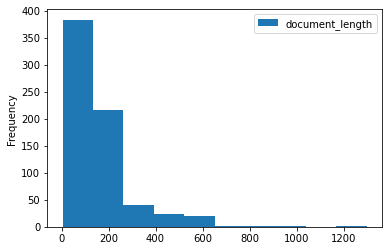

In [27]:
_ = data.plot(y='document_length', kind='hist')


**<span style="color:red">To do</span>**:

> * Maintenant que nous avons utilisé [`spaCy`](https://spacy.io) pour le prétraitement, écrivez une fonction qui utilise la bibliothèque [`nltk`](https://www.nltk.org/). 
> * Utilisez [```word_tokenize```](https://www.nltk.org/api/nltk.tokenize.html) pour la tokenisation, téléchargez les mots vides nltk avec ``python -m nltk.downloader stopwords`` et supprimez tous les autres **tokens** qui, selon vous, nuiront à la précision des algorithmes d'apprentissage automatique (nombres? Ponctuation? Etc.)


In [28]:
!pip install nltk
!python -m nltk.downloader stopwords

/home/daj/anaconda3/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /home/daj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
!python -m nltk.downloader averaged_perceptron_tagger

/home/daj/anaconda3/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/daj/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [30]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

nltk_stop_words = set(stopwords.words('english'))

def preprocess_with_nltk(phrase):
    
    tokens = [word.replace('\n', '').strip() for word in word_tokenize(phrase) 
              if word.lower() not in nltk_stop_words]
    tokens = [token for token in tokens if len(token) > 1]
    
    '''
    for word in word_tokenize(phrase):
        tokens_w = []
        if word not in stop_words:
            tokens_w.append(word)
    
    tokens.append(tokens_w)'''
    
    
    if len(tokens) > 1:
        return tokens
    return None

data['cleaned_text_nltk'] = data['text'].apply(preprocess_with_nltk)

[nltk_data] Downloading package stopwords to /home/daj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
data.head()

,path,label,text,cleaned_text,document_length,cleaned_text_nltk
160,Note/0000248859.txt,Note,DLN. Seuseee 8716793\n\n \n\n \n\nS2etS8S02.9,"[DLN, Seuseee, 8716793, S2etS8S02.9]",4,"[DLN, Seuseee, 8716793, S2etS8S02.9]"
473,Note/2073440248.txt,Note,ARTHUR GC. PADOAN\n\nerz0rVvelo?,"[ARTHUR, GC, PADOAN, erz0rVvelo]",4,"[ARTHUR, GC, PADOAN, erz0rVvelo]"
193,Note/2063603124.txt,Note,VELTEQIEI0Z\n\nHl\nWEOMUPAT eee =,"[VELTEQIEI0Z, Hl, WEOMUPAT, eee]",4,"[VELTEQIEI0Z, Hl, WEOMUPAT, eee]"
322,Note/1002465404.txt,Note,&\n\nmae\n\nW. Hickey\n\nP. Kornbluth,"[mae, W., Hickey, P., Kornbluth]",5,"[mae, W., Hickey, P., Kornbluth]"
666,Note/2028589254.txt,Note,Nevis ate\n\n \n\nDee Shannonhouse\n\n<\ns\n\n...,"[Nevis, ate, Dee, Shannonhouse, PS2G6SsSRzo7]",5,"[Nevis, ate, Dee, Shannonhouse, PS2G6SsSRzo7]"


Maintenant que nous savons **nettoyer les données**, nous pouvons aussi analyser le corpus avec des autres stratistiques, comme les occurences de chaque mot. Nous utilisons la classe [`nltk.FreqDist`](https://www.nltk.org/api/nltk.html?highlight=freqdist).

Plus d'informations pour [`numpy hstack`](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html) 

In [32]:
import numpy as np

freq = nltk.FreqDist(np.hstack(data['cleaned_text']))

In [33]:
freq

FreqDist({'smoking': 299, 'tobacco': 212, 'Research': 211, 'Date': 210, 'University': 205, 'Subject': 189, 'New': 184, 'Dr.': 182, 'J.': 182, 'smoke': 173, ...})

In [34]:
for word in ['cigarettes', 'cancer', 'alcohol', 'death']:
    print(word, ':', freq[word])

cigarettes : 133
cancer : 98
alcohol : 16
death : 23


On peut grâce à `FreqDist` récupérer les 25 termes les plus courants du corpus.

In [35]:
print(freq.most_common(25))

[('smoking', 299), ('tobacco', 212), ('Research', 211), ('Date', 210), ('University', 205), ('Subject', 189), ('New', 184), ('Dr.', 182), ('J.', 182), ('smoke', 173), ('Mr.', 172), ('cigarette', 170), ('Tobacco', 154), ('R.', 154), ('smokers', 152), ('A.', 151), ('PM', 147), ('10', 138), ('said', 136), ('cigarettes', 133), ('ee', 132), ('York', 125), ('cells', 125), ('study', 121), ('Department', 120)]


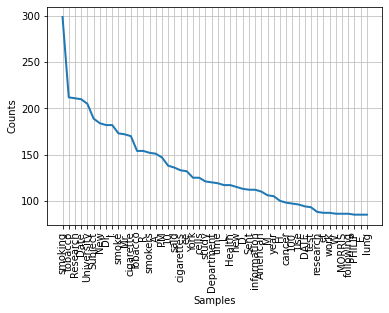

In [36]:
_ = freq.plot(50, cumulative=False)

### Co-occurences

En plus du processus de *tokenisation*, il est possible de représenter le texte en groupe de plusieurs mots adjacents. On appelle les groupes de mots les [**n-grammes**](https://fr.wikipedia.org/wiki/N-gramme) : **bigrammes** pour les **couples** de mots, **trigrammes** pour les **groupes de trois**, etc. Séparer en **mots individuels** est en fait un cas particulier appelé **unigramme**.

Par exemple, on peut extraire les **bigrammes** :



In [37]:
list(nltk.ngrams(np.hstack(data['cleaned_text']), 2))[:10]

[('DLN', 'Seuseee'),
 ('Seuseee', '8716793'),
 ('8716793', 'S2etS8S02.9'),
 ('S2etS8S02.9', 'ARTHUR'),
 ('ARTHUR', 'GC'),
 ('GC', 'PADOAN'),
 ('PADOAN', 'erz0rVvelo'),
 ('erz0rVvelo', 'VELTEQIEI0Z'),
 ('VELTEQIEI0Z', 'Hl'),
 ('Hl', 'WEOMUPAT')]

### 2.2.2  Lemmatisation

Le processus de « [**lemmatisation**](https://fr.wikipedia.org/wiki/Lemmatisation) » consiste à représenter les mots (ou [lemmes](https://fr.wikipedia.org/wiki/Lemme_(linguistique)) en linguistique) sous leur forme canonique. Par exemple pour un verbe, ce sera son infinitif. Pour un nom, son masculin singulier. On ne **conserve que le sens des mots** utilisés dans le corpus.

Si l’on désire étudier la richesse d’un vocabulaire, il est effectivement préférable de compter les occurences de « *be* » plutôt que « *is* » ou « *was* » qui sont des conjugaisons du même verbe, « *to be* ». Il en va de même pour toutes les autres formes verbales, nominales, adjectifs ou adverbes.

Le termes **had** et **been** auraient dû être respectivement remplacés par **have** et **be**. La fonction `lemmatize` en est incapable car nous ne lui avons pas fourni les [étiquettes grammaticales](https://fr.wikipedia.org/wiki/Nature_(grammaire)) associées aux différents termes comme précédemment, en indiquant `wordnet.ADJ` pour **adjectif** ou `wordnet.NOUN` pour **nom**. Ces étiquettes grammaticales sont appelées [*Part Of Speech*](https://en.wikipedia.org/wiki/Part_of_speech) en anglais, d’où le nom du paramètre, `pos`. 
Qu'est-ce que wordnet ? [```WordNet```](https://en.wikipedia.org/wiki/WordNet)

**<span style="color:red">To do</span>**:

> * Utilisez [```lemmatizer.lemmatize()```](https://www.machinelearningplus.com/nlp/lemmatization-examples-python/) pour la tokenisation, téléchargez les mots vides nltk avec ``python -m nltk.downloader stopwords`` et supprimez tous les autres **tokens** qui, selon vous, nuiront à la précision des algorithmes d'apprentissage automatique (nombres ? ponctuation ? Etc.)


In [38]:
!python -m nltk.downloader wordnet

/home/daj/anaconda3/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to /home/daj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

# Initialiser WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

In [40]:
print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))
print(lemmatizer.lemmatize("run"))
print(lemmatizer.lemmatize("run",'v'))

cat
cactus
goose
rock
python
good
best
run
run


In [41]:
#test
nltk.pos_tag(["This", "is", "an", "example"])

POS_TAG_CORRESPONDANCE = {"j": wordnet.ADJ,
                          "n": wordnet.NOUN,
                          "v": wordnet.VERB,
                          "r": wordnet.ADV}



for idx, word_pos in enumerate(nltk.pos_tag(["This", "is", "an", "example"])):
    #print(word)
    l = word_pos[1][0].lower()
    if l in POS_TAG_CORRESPONDANCE.keys():
        pos_tag_word = POS_TAG_CORRESPONDANCE.get(l)
    else:
        pos_tag_word = wordnet.NOUN
    print(lemmatizer.lemmatize(word_pos[0], pos_tag_word))

This
be
an
example


In [42]:
print("corpora :", lemmatizer.lemmatize("corpora", pos="n"))
print("better : ", lemmatizer.lemmatize("better", pos=wordnet.ADJ))

corpora : corpus
better :  good


**<span style="color:red">To do</span>**:

> * Ecrivez une méthode de prétraitement qui effectue également la lemmatisation.

In [43]:
# Lemmatization en tenant compte du contexte

def preprocess_with_nltk_and_lemmatisation(phrase):
    #Dictionnaire pour definir les correspondance entre la valeur renvoyé par nltk.pos_tag et Wordnet 
    #qu'on passera en paramètre
    POS_TAG_CORRESPONDANCE = {"j": wordnet.ADJ,
                              "n": wordnet.NOUN, 
                              "v": wordnet.VERB, 
                              "r": wordnet.ADV}
    
    # Convertir la phrase en token en remplacant les /n par des espaces, et en supprimants les stopwords
    tokens = [word.replace('\n', '').strip() for word in word_tokenize(phrase) 
              if word.lower() not in nltk_stop_words]
    
    # Tenir compte que des mots avec plus d'un caractère
    tokens = [token for token in tokens if len(token) > 1]
    
    # Appliquer la lemmatization en fonction du pos_tag du chaque mot, le contexte.
    for idx, word in enumerate(nltk.pos_tag(tokens)):
        #print(word)
        l = word[1][0].lower()
        if l in POS_TAG_CORRESPONDANCE.keys():
            pos_tag_word = POS_TAG_CORRESPONDANCE.get(l)
        else:
            pos_tag_word = wordnet.NOUN
        #print(pos_tag_word)
        tokens[idx] = lemmatizer.lemmatize(word[0], pos_tag_word)
        
        #print(lemmatizer.lemmatize(word[0], tag_word))
                             
    if len(tokens) > 1:
        return " ".join(tokens)
    return None

data['cleaned_text_nltk_and_lemmatisation'] = data['text'].apply(preprocess_with_nltk_and_lemmatisation)

In [44]:
data.head()

,path,label,text,cleaned_text,document_length,cleaned_text_nltk,cleaned_text_nltk_and_lemmatisation
160,Note/0000248859.txt,Note,DLN. Seuseee 8716793\n\n \n\n \n\nS2etS8S02.9,"[DLN, Seuseee, 8716793, S2etS8S02.9]",4,"[DLN, Seuseee, 8716793, S2etS8S02.9]",DLN Seuseee 8716793 S2etS8S02.9
473,Note/2073440248.txt,Note,ARTHUR GC. PADOAN\n\nerz0rVvelo?,"[ARTHUR, GC, PADOAN, erz0rVvelo]",4,"[ARTHUR, GC, PADOAN, erz0rVvelo]",ARTHUR GC PADOAN erz0rVvelo
193,Note/2063603124.txt,Note,VELTEQIEI0Z\n\nHl\nWEOMUPAT eee =,"[VELTEQIEI0Z, Hl, WEOMUPAT, eee]",4,"[VELTEQIEI0Z, Hl, WEOMUPAT, eee]",VELTEQIEI0Z Hl WEOMUPAT eee
322,Note/1002465404.txt,Note,&\n\nmae\n\nW. Hickey\n\nP. Kornbluth,"[mae, W., Hickey, P., Kornbluth]",5,"[mae, W., Hickey, P., Kornbluth]",mae W. Hickey P. Kornbluth
666,Note/2028589254.txt,Note,Nevis ate\n\n \n\nDee Shannonhouse\n\n<\ns\n\n...,"[Nevis, ate, Dee, Shannonhouse, PS2G6SsSRzo7]",5,"[Nevis, ate, Dee, Shannonhouse, PS2G6SsSRzo7]",Nevis ate Dee Shannonhouse PS2G6SsSRzo7



### 2.2.3 Racinisation

Un autre processus, la [**racinisation**](https://fr.wikipedia.org/wiki/Racinisation) (ou *stemming* en anglais) a une approche similaire. Cela consiste à ne conserver que la racine des mots étudiés : on supprime suffixes, préfixes et autres afin de ne conserver que la racine. C’est un procédé plus simple que la lemmatisation et plus rapide à effectuer puisque les mots sont tronqués contrairement à la lemmatisation qui nécessite d’utiliser un dictionnaire.

En anglais, de tels dictionnaires existent, contrairement au français. Pour un texte en français, on utilisera plus simplement une **racinisation**, alors qu’en anglais, on pourra appliquer les deux traitements.


In [45]:
from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()

La **racinisation** va tronquer les mots, par exemple comme ci-dessous :

In [46]:
print("stayed :", stemmer.stem("stayed"))
print("friends : ", stemmer.stem("friends"))
print("gaming :", stemmer.stem("gaming"))

stayed : stay
friends :  friend
gaming : game


**<span style="color:red">To do</span>**:

> * Ecrivez une méthode de prétraitement qui effectue également la racinisation.

In [47]:
def preprocess_with_nltk_and_stemming(phrase):
    
    tokens = [word.replace('\n', '').strip() for word in word_tokenize(phrase) 
              if word.lower() not in nltk_stop_words]
    
    # Convertir la phrase en token en remplacant les /n par des espaces, et en supprimants les stopwords
    tokens = [word.replace('\n', '').strip() for word in word_tokenize(phrase) 
              if word.lower() not in nltk_stop_words]
    
    # Tenir compte que des mots avec plus d'un caractère
    tokens = [token for token in tokens if len(token) > 1]
    
    # La racinisation
    tokens = [stemmer.stem(token) for token in tokens ]
    
    
    if len(tokens) > 1:
        return " ".join(tokens)
    return None

data['cleaned_text_nltk_and_stemming'] = data['text'].apply(preprocess_with_nltk_and_stemming)

In [48]:
data.head()

,path,label,text,cleaned_text,document_length,cleaned_text_nltk,cleaned_text_nltk_and_lemmatisation,cleaned_text_nltk_and_stemming
160,Note/0000248859.txt,Note,DLN. Seuseee 8716793\n\n \n\n \n\nS2etS8S02.9,"[DLN, Seuseee, 8716793, S2etS8S02.9]",4,"[DLN, Seuseee, 8716793, S2etS8S02.9]",DLN Seuseee 8716793 S2etS8S02.9,dln seusee 8716793 s2ets8s02.9
473,Note/2073440248.txt,Note,ARTHUR GC. PADOAN\n\nerz0rVvelo?,"[ARTHUR, GC, PADOAN, erz0rVvelo]",4,"[ARTHUR, GC, PADOAN, erz0rVvelo]",ARTHUR GC PADOAN erz0rVvelo,arthur gc padoan erz0rvvelo
193,Note/2063603124.txt,Note,VELTEQIEI0Z\n\nHl\nWEOMUPAT eee =,"[VELTEQIEI0Z, Hl, WEOMUPAT, eee]",4,"[VELTEQIEI0Z, Hl, WEOMUPAT, eee]",VELTEQIEI0Z Hl WEOMUPAT eee,velteqiei0z hl weomupat eee
322,Note/1002465404.txt,Note,&\n\nmae\n\nW. Hickey\n\nP. Kornbluth,"[mae, W., Hickey, P., Kornbluth]",5,"[mae, W., Hickey, P., Kornbluth]",mae W. Hickey P. Kornbluth,mae w. hickey p. kornbluth
666,Note/2028589254.txt,Note,Nevis ate\n\n \n\nDee Shannonhouse\n\n<\ns\n\n...,"[Nevis, ate, Dee, Shannonhouse, PS2G6SsSRzo7]",5,"[Nevis, ate, Dee, Shannonhouse, PS2G6SsSRzo7]",Nevis ate Dee Shannonhouse PS2G6SsSRzo7,nevi ate dee shannonhous ps2g6sssrzo7


# 4. Representation des mots


## 4.1 « *bag of words* » (sac de mots)

L’**extraction d’information** est l’étape qui suit le **nettoyage** du corpus. Pour ce faire, il nous faut changer la représentation du texte pour qu’il puisse être utilisé par un modèle statistique, et pour pouvoir l’exploiter.

Dans les deux premières parties, nous avons représenté les corpus comme des **listes de mots ou lemmes ou racines**. Pour chaque document, nous avons représenté les termes dans un **sac**, sans prendre en compte le contexte de chaque terme. Dans ce **sac** est contenu un vocabulaire, le vocabulaire du document auquel on a associé le nombre d’occurence de chaque **lemme** dans le document. C’est ce que nous avons déjà fait à l’aide des deux normalisations que sont la **lemmatisation** et la **racinisation**.

Une représentation **bag-of-words** classique sera donc celle dans laquelle on représente chaque document par un vecteur de la taille du vocabulaire $|V|$. On utilisera la matrice composée de l’ensemble de ces $N$ documents qui forment le corpus comme entrée de nos algorithmes.

Nous pouvons construire ces vecteurs $V$ à l’aide de la classe [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) de `scikit-learn` :


Ceci est juste un petit exemple avec les documents de 110 à 130 (problèmes de ressources mémoire).

In [49]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2))
vectorizer.fit(np.hstack(data['cleaned_text'][110:130]))

X = vectorizer.transform(np.hstack(data['cleaned_text'][110:130]))

pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names()).T

,0,1,2,3,4,5,6,7,8,9,...,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020
000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0000029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000204000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
003517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youth,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
z8tsz09zo0s,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zigaretten,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**<span style="color:red">To do</span>**:

> * Écrivez le même code mais avec des gammes de mots n-grammes ou char n-grammes différents. Plus d'info [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

#Paramètres
#stop_words: enlever les mots vides.
#ngram_range: chaine de n mots d'affilé
# Min_df, max_df: frequence min et max que les mots / n-grammes du doc doit avoir pour etre consideré
# Max_feature: choisira les mots les plus fréquents dans son vocabulaire et supprimera tout le reste.
# Analyser: Si la fonction doit être constituée d'un mot n-gramme ou d'un caractère n-grammes


vectorizer = CountVectorizer(analyzer='char',
                             ngram_range=(4,4))




vectorizer.fit(np.hstack(data['cleaned_text'])[110:130])


X = vectorizer.transform(np.hstack(data['cleaned_text'])[110:130])

pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names()).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
aamt,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
aina,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
alam,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
arni,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
arte,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
edto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
egna,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
ener,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
eral,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
gene,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Représenter un document par des *n-grammes* n’a d’intérêt que si l’on peut le faire relativement à leur apparition dans les autres documents. Nous recherchons là des *n-grammes* qui permettent de discriminer les documents entre eux, ceux qui confèrent une information utilie à la discrimination.

Un lemme apparaissant dans un unique document dans un corpus est un lemme qui discrimine ce document et permet de l’identifier avec précision.

Ce que nous désirons faire avec [**TF-IDF**](https://fr.wikipedia.org/wiki/TF-IDF) est de mettre en application ce qui est décrit précédemment. Nous voulons pondérer la fréquence d’apparition d’un lemme dans un document par rapport à son apparition dans l’ensemble des documents du corpus. La fréquence de chaque lemme est donc pondérée à l’ensemble du corpus.

En l’occurence, la métrique **TF-IDF** (*Term-Frequency* − *Inverse Document Frequency*) utilise comme indicateur de similarité l’*inverse document frequency* qui est l’inverse de la proportion de document qui contient le terme, à l'échelle logarithmique.

Nous calculons donc le poids **TF-IDF** final attribué au n-gramme :

$tfidf_{i,j} = tf_{i,j} × idf_{i}$

Pour connaître les termes qui représentent le plus un document, nous allons utiliser la [fonction **TF-IDF**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) de `scikit-learn`. **Attention aux valeurs par défaut lors de l’initialisation**.


**Note :** nous traitons des *n-grames*, donc utilisez le paramètre [`ngram_range`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) de la classe [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) lors de son instanciation.

**Note :** pour transformer vos vecteurs résultats (obtenus par appel à `fit_transform`) en des données utilisables dans un `DataFrame`, vous devez utiliser `vectors.toarray()`. À la création de votre `DataFrame`, nommez les colonnes avec le nom des lemmes utilisés (ce sont les *features* de l’opération, vous pouvez les récupérer avec `get_feature_names()`).

**Note :** comment on renverse une matrice ? En demandant sa transposée. Pour la transposée d’un `pd.DataFrame`, on accède simplement l’attribut `T` du `pd.DataFrame`.

In [51]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(np.hstack(data['cleaned_text'])[110:130])

pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names()).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
aamt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alam,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ate,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
general,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
itt,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ope,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pregnant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
saz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**<span style="color:red">To do</span>**:

> * Écrivez le même code mais avec des gammes de mots n-grammes ou char n-grammes différents. Plus d'info [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='char_wb',
                            ngram_range=(10,10))
vectors = vectorizer.fit_transform(np.hstack(data['cleaned_text'])[110:130])

pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names()).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
aamt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alam,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ate,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
general,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
itt,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ope,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pregnant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
saz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4. 2 Plongements de mots (Word Embeddings)

La dernière répresentation des mots que nous analyserons est la répresentation **word embeddings**. 
Les **plongements de mots** (ou *word embedding*) est une technique d'apprentissage et de représentation de mots d’un texte. Elle consiste à représenter les mots sous forme de vecteurs de nombres réels qui ont la particularité d’être proches (dans leurs espaces vectoriels) si leurs contextes sont similaires.

Ils peuvent être générés de plusieurs façons, comme les [réseaux de neuronnes](https://www.tensorflow.org/tutorials/text/word_embeddings) ou les matrices de [cooccurences](https://fr.wikipedia.org/wiki/Cooccurrence), des modèles probabilistes (TF-IDF vecteurs), etc.

Cette nouvelle représentation a ceci de particulier que les mots apparaissant dans des contextes similaires possèdent des vecteurs correspondants qui sont relativement proches. Par exemple, on pourrait s'attendre à ce que les mots « chien » et « chat » soient représentés par des vecteurs relativement peu distants dans l'espace vectoriel où sont définis ces vecteurs. Cette technique est basée sur l'hypothèse qui veut que les mots apparaissant dans des contextes similaires ont des significations apparentées. 

<figure>
    <center>
    <img src="images/we.png" width="300" height="400">
    <figcaption>Source: <a href="https://unbabel.com/blog/fr/lia-vous-parle-mais-comprend-elle-ce-quelle-dit/"> link</a></figcaption>
    </center>
</figure>

Différents  plongements (embeddings) de mots :

*  [Collobert & Weston](http://www.jmlr.org/papers/volume12/collobert11a/collobert11a.pdf) https://ronan.collobert.com/senna/
* [Word2Vec Google News](https://code.google.com/archive/p/word2vec/)
* [GloVe](https://nlp.stanford.edu/projects/glove/)
* [FastText](https://github.com/facebookresearch/fastText)


Le word embedding d'un mot peut être récupérée en utilisant la bibliothèque **spaCy**.


In [53]:
token = nlp("tobacco")
token, token.vector.shape, token.vector

(tobacco,
 (96,),
 array([-0.95363724,  0.86383176,  2.574287  , -1.8110167 ,  0.49444383,
        -0.5130198 ,  2.2844305 , -1.4999868 , -2.7821345 ,  3.0919025 ,
         0.57495487,  0.77825505,  1.5156562 , -0.02756524, -1.320309  ,
        -0.24368042,  3.1093223 ,  2.1634014 , -1.4922388 ,  2.9528027 ,
         1.3284059 , -0.01470065,  1.6816866 , -2.3759463 , -1.9851344 ,
        -0.48088384,  0.38164344, -2.488275  ,  0.07504857, -2.8868165 ,
        -0.5921559 , -1.4458424 ,  3.2120957 ,  1.024904  , -1.283343  ,
         0.55085087,  0.33682144, -1.6132644 ,  0.61444485, -2.2384043 ,
         1.1384641 ,  1.3115534 ,  2.5513127 , -1.2671552 ,  3.4591713 ,
        -0.79837227, -1.1489938 ,  2.3382134 ,  1.436438  ,  0.5820909 ,
        -1.005724  , -0.59881234,  0.9339581 , -0.45056987, -4.2036543 ,
         5.10793   ,  3.1668549 ,  0.474485  , -2.6055672 , -1.7485673 ,
        -2.2374237 , -0.4836712 ,  0.29819405, -4.633446  ,  1.6259418 ,
         2.8101506 ,  0.08941367,

**spaCy** est capable de comparer deux mots et de faire une prédiction de leur similitude. La prédiction de la similarité est utile pour créer des systèmes de recommandation ou pour signaler les doublons. Par exemple, vous pouvez suggérer un contenu similaire à ce que l'utilisateur recherche actuellement ou étiqueter un ticket d'assistance comme doublon s'il est très similaire à un ticket déjà existant.

Chaque **Doc**, **Span** et **Token** est livré avec une **.similarity()** méthode qui vous permet de le comparer avec un autre objet et de déterminer la similitude. Bien sûr, la similitude est toujours subjective - si «chien» et «chat» sont similaires dépend vraiment de la façon dont vous le regardez. Le modèle de similarité de **spaCy** suppose généralement une définition assez générale de la similitude.

Généralement, ene fois que nous aurons des vecteurs du texte donné, pour calculer la similitude entre les vecteurs générés, des méthodes statistiques pour la similitude vectorielle peuvent être utilisées. Ces techniques sont la *similitude cosinus*, la *distance euclidienne*, la *distance de Jaccard*, la distance *word mover*. La *similitude cosinus* est la technique qui est largement utilisée pour la similitude de texte (**spaCy** utilise cette similitude).


In [54]:
token = nlp('cigarettes')
for word in ['cigarettes', 'health', 'cancer', 'capitalism', 'doctor', 'nurse', 'hospital', 'money', 'death']:
    print('cigarettes', '~', word, ':', token.similarity(nlp(word)))

cigarettes ~ cigarettes : 1.0
cigarettes ~ health : 0.45187019715714843
cigarettes ~ cancer : 0.5121348356764873
cigarettes ~ capitalism : 0.4619889919942927
cigarettes ~ doctor : 0.28254939984947297
cigarettes ~ nurse : 0.4784342220761789
cigarettes ~ hospital : 0.44845680102368063
cigarettes ~ money : 0.27628706922227875
cigarettes ~ death : 0.3396450622212665


/home/daj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  This is separate from the ipykernel package so we can avoid doing imports until


Pour voir l'exemple de la figure présentée précédemment, nous calculons la distance entre tous les mots * spaCy * pour trouver les mots les plus similaires pour le calcul: **king − man + woman ≈ queen**

In [55]:
from scipy import spatial
nlp = spacy.load('en_core_web_md')
 
cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)
 
man = nlp.vocab['man'].vector
woman = nlp.vocab['woman'].vector
queen = nlp.vocab['queen'].vector
king = nlp.vocab['king'].vector
 
# Nous devons maintenant trouver le vecteur le plus proche du vocabulaire du résultat de "man" - "woman" + "queen"
maybe_king = man - woman + queen
computed_similarities = []
 
for word in nlp.vocab:
    # Ignorer les mots sans vecteurs
    if not word.has_vector:
        continue
 
    similarity = cosine_similarity(maybe_king, word.vector)
    computed_similarities.append((word, similarity))

computed_similarities = sorted(computed_similarities, key=lambda item: -item[1])
print([w[0].text for w in computed_similarities[:10]])
 

['queen', 'king', 'man', 'Mr.', 'He', 'he', "'Cause", "'cause", 'Let', 'let']


# 5. Preparation pour apprentissage automatique (machine learning) et apprentissage profond (deep learning)

### 5.1 Diviser les jeux de données 
Afin d'entraîner des modèles pour apprentissage automatique et évaluer la performance de ses modèles avec chaque répresentation de mots, nous allons diviser les jeux de données en : entraînement, validation et test.

Afin d'évaluer correctement la performance de chaque modèle, il est très important que les données d'entraînement et de test soient différentes. La bibliothèque <b>sklearn</b> a la fonction <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html"><i>train_test_split</i></a> qui divise un jeux de données. Le parametre <i>test_size</i> défini la taille du test (pourcentage) dans les jeux de données.

Pour comprendre pourquoi nous devons diviser les données de cette manière, vous pouvez regarder Andrew Ng expliquer [ici](https://www.youtube.com/watch?v=1waHlpKiNyY). Ng est professeur à l'Université de Stanford et pionnier de l'éducation en ligne, Ng a cofondé [Coursera](https://www.coursera.org/learn/machine-learning) et [deeplearning.ai](https://www.deeplearning.ai/). Il a mené avec succès de nombreux efforts pour «démocratiser l'apprentissage profond» en enseignant plus de 2,5 millions d'étudiants grâce à ses cours en ligne. Il est l'un des informaticiens les plus connus et les plus influents au monde.

Dans notre cas, nous irons fournir les phrases et les classes pour chaque phrase et la taille du jeu de données de test. Pour l'instant, on a pas besoin de donees de validation. On va voir de ca plus tard.

Pour plus de simplicité, nous allons travailler uniquement avec des données pour entraînement et test.

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2)
len(X_train), len(X_test)

(551, 138)

# 6. Apprentissage automatique (machine learning)

L'objectif de la catégorisation de textes est de pouvoir associer automatiquement des documents à des classes (catégories, étiquettes, index) prédéfinies. Nous nous plaçons dans le cadre de l'apprentissage automatique supervisé. 



### 5.2 Approaches de classification

La classification naïve bayésienne est un type de classification bayésienne probabiliste simple basée sur le théorème de Bayes avec une forte indépendance des hypothèses. Elle met en œuvre un classifieur bayésien naïf, ou classifieur naïf de Bayes, appartenant à la famille des classifieurs linéaires. 

Un classifieur bayésien naïf suppose que l'existence d'une caractéristique pour une classe, est indépendante de l'existence d'autres caractéristiques. Un fruit peut être considéré comme une pomme s'il est rouge, arrondi, et fait une dizaine de centimètres. Même si ces caractéristiques sont liées dans la réalité, un classifieur bayésien naïf déterminera que le fruit est une pomme en considérant indépendamment ces caractéristiques de couleur, de forme et de taille. 

Le modèle probabiliste de cette approache est le modèle conditionnel $P(X | x_1,...,x_n)$, où $X$ est la variable « de classe » (celle qui indique si un individu appartient à une classe donnée) conditionnée par plusieurs variables caractéristiques $x_i$ (par exemple l’aile, le bec et cancane).

Le théorème de Bayes s’énonce avec nos notations de la manière suivante :

<center>
$P(X|x_1, ..., x_n) = \frac{P(x_1, ..., x_n | X)P(X)}{P(x_1, ..., x_n)}$
</center>

L'avantage du classifieur bayésien naïf est qu'il requiert relativement peu de données d'entraînement pour estimer les paramètres nécessaires à la classification, à savoir moyennes et variances des différentes variables.

La bibliothèque sklearn fournit une classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html">MultinomialNB</a> qui nous permet d'entraîner et tester un modèle à partir d'un jeux de données d'entraînement.

Tout d'abord, nous représentons les documents en utilisant TF-IDF.

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Ensuite, nous utilisons les données d'entraînement pour entraîner le modèle.

In [58]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
_ = clf.fit(X_train_tfidf, y_train)

Après avoir entraîné notre modèle, nous pouvons faire la prediction des classes des messages du jeux de données de test.
 
## Analyse d'erreurs

Le taux d'erreur de classification donne une évaluation des performances pour toutes les classes. Mais comme les classes ne sont pas également réparties, elles peuvent ne pas être également bien modélisées. Afin d'avoir une meilleure idée des performances du classifieur, des métriques détaillées doivent être utilisées:

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) fournit une analyse détaillée par classe: la précision (parmi tous les exemples classés en classe X, combien sont réellement de la classeX) et le rappel (parmi tous les exemples qui sont de la classe X, combien sont classés en classe X) et le F-Score qui est une moyenne harmonique pondérée de la précision et du rappel.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) qui donnent les confusions entre les classes.

F1-score = 2 x $\frac{précision\ x\ rappel}{précision\ +\ rappel}$

 - précision : la proportion d'identifications positives était effectivement correcte.
 - rappel : la proportion de résultats positifs réels a été identifiée correctement. 


**<span style="color:red">To do</span>**:

> * Rapportez le `classification_report` pour votre classificateur. Quelles classes ont les meilleurs scores ? Pourquoi ?
> * Rapportez la `confusion_matrix` pour votre classificateur. Quelles classes sont les plus confuses ? Pourquoi ?

In [59]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

Advertisement       0.00      0.00      0.00         7
        Email       0.91      0.91      0.91        23
         Form       0.38      0.14      0.20        22
       Letter       0.64      0.39      0.49        23
         Memo       0.25      1.00      0.40        23
         News       0.00      0.00      0.00         8
         Note       0.00      0.00      0.00         4
       Report       0.00      0.00      0.00         9
       Resume       0.00      0.00      0.00         7
   Scientific       0.00      0.00      0.00        12

     accuracy                           0.41       138
    macro avg       0.22      0.24      0.20       138
 weighted avg       0.36      0.41      0.33       138



/home/daj/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Commentaires:
Les meilleurs scores sont ceux de memo et email car les rappels et les F1scores sont superieurs à 50% ce qui est acceptable.

la precision et le rappel de Email sont respectivement de 85% et 96% et le f1-score est de 90%

la precision de memo est faible: 0.46 mais son rappel est très bon: 93% , le F1-score est:62 %. Ce qui veut dire que le modèle reconnait très bien cette classe, aussi il lui affecte souvent des features qui ne sont pas les siens.

Pour des classes comme scientific la precision est de 100% mais le rappel très faible. On peut deduire que cette classe n'est pas bien classée. Pareil pour News, Note, Report, Resume mal classées. Aucun feature reconnu. le score f1 pour ces derniers est de 0%   


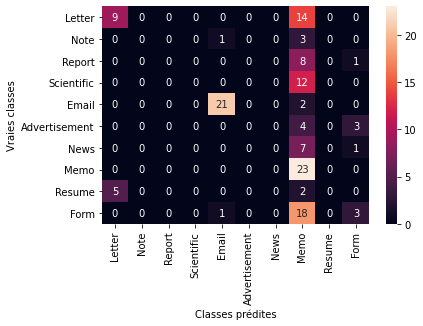

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred, labels = list(set(y_train))), annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.ylabel('Vraies classes')
plt.xlabel('Classes prédites')
plt.show()

## Commentaires:
Les diagonales representent les bonnes predictions. Les classes confuses sont donc : News, Note, Report, Resume, Scientific, advertissement tandis que Memo et Emails sont bien classées.

Pour les classes confuses, le modèle n'a reconnu aucun feature de ces classes. Il les a attribué aux autres classes. Par exemple pour les 8 features de la classe News, le modèle a affecté 7 dans la classe memo, et 1 dans form.

Les machines à vecteurs de support (en anglais support vector machine, SVM) sont un ensemble de techniques d'apprentissage supervisé destinées à résoudre des problèmes de discrimination et de régression. Ces techniques reposent sur deux idées clés : la notion de marge maximale et la notion de fonction noyau.

La <b>marge</b> est la distance entre la frontière de séparation et les échantillons les plus proches. Dans les SVM, la frontière de séparation est choisie comme celle qui maximise la marge.

<figure>
    <center>
    <img src="images/marge.png" width="400" height="400">
    <figcaption>Source: <a href="https://fr.wikipedia.org/wiki/Machine_%C3%A0_vecteurs_de_support"> link</a></figcaption>
    </center>
</figure>

La deuxième idée clé des SVM est de transformer l'espace de représentation des données d'entrées en un espace de plus grande dimension, dans lequel il est probable qu'il existe une séparation linéaire. Les fonctions <b>noyau</b> permettent de transformer un produit scalaire dans un espace de grande dimension, ce qui est coûteux, en une simple évaluation ponctuelle d'une fonction. Des noyaux usuels employés avec les SVM sont : le noyau polynomial et le noyau gaussien.

<figure>
    <center>
    <img src="images/noyau.png" width="400" height="400">
    <figcaption>Source: <a href="https://fr.wikipedia.org/wiki/Machine_%C3%A0_vecteurs_de_support"> link</a></figcaption>
    </center>
</figure>

La bibliothèque sklearn propose un module pour utiliser de <a href="https://scikit-learn.org/stable/modules/svm.html">SVMs</a>.

**<span style="color:red">To do</span>**:

> * Entraînez, testez et faites l'évaluation du modèle SVM linéaire.


In [61]:
from sklearn import svm

clf = svm.LinearSVC()
_ = clf.fit(X_train_tfidf, y_train)

In [62]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

Advertisement       1.00      0.14      0.25         7
        Email       1.00      1.00      1.00        23
         Form       0.68      0.77      0.72        22
       Letter       0.78      0.78      0.78        23
         Memo       0.59      0.83      0.69        23
         News       0.64      0.88      0.74         8
         Note       1.00      0.25      0.40         4
       Report       1.00      0.11      0.20         9
       Resume       1.00      1.00      1.00         7
   Scientific       0.64      0.75      0.69        12

     accuracy                           0.75       138
    macro avg       0.83      0.65      0.65       138
 weighted avg       0.79      0.75      0.72       138



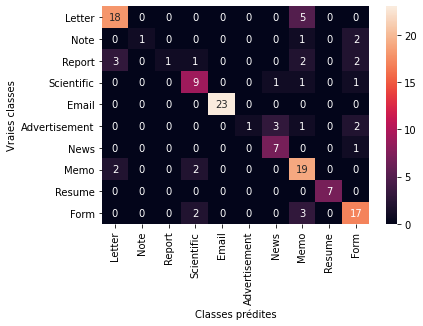

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred, labels = list(set(y_train))), annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.ylabel('Vraies classes')
plt.xlabel('Classes prédites')
plt.show()

**<span style="color:red">To do</span>**:

> * Utilisez les autres méthodes de prétraitement (avec lemmatisation, avec racinisation, etc.) et comparez les résultats de ces deux modèles.


## Apprentissage avec Lemmatisation

In [132]:
from sklearn.model_selection import train_test_split

# Diviser les donnees en 80% pour l'entrainement et 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text_nltk_and_lemmatisation'], data['label'], test_size=0.2)
len(X_train), len(X_test)

(551, 138)

In [65]:
# transformation TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [66]:
# Les algorithmes utilisés pour la classification
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": svm.LinearSVC() 
}

In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Matice de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB

<><><><><><><><><><><><><><><><><><><><>
           Naive Bayes
<><><><><><><><><><><><><><><><><><><><>
 les principales Metriques de classification:
                precision    recall  f1-score   support

Advertisement       0.00      0.00      0.00         7
        Email       0.81      0.85      0.83        20
         Form       0.90      0.41      0.56        22
       Letter       0.60      0.33      0.43        27
         Memo       0.30      1.00      0.46        26
         News       0.00      0.00      0.00        11
         Note       0.00      0.00      0.00         4
       Report       0.00      0.00      0.00         8
       Resume       0.00      0.00      0.00         4
   Scientific       1.00      0.44      0.62         9

     accuracy                           0.47       138
    macro avg       0.36      0.30      0.29       138
 weighted avg       0.50      0.47      0.42       138



/home/daj/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


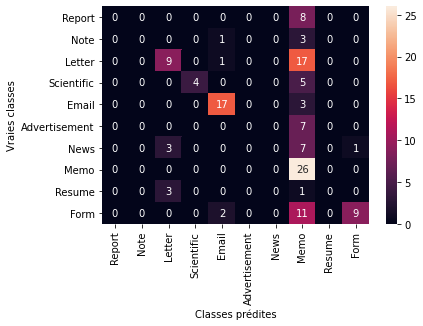

<><><><><><><><><><><><><><><><><><><><>
           Support Vector Machine
<><><><><><><><><><><><><><><><><><><><>
 les principales Metriques de classification:
                precision    recall  f1-score   support

Advertisement       1.00      0.71      0.83         7
        Email       0.94      0.85      0.89        20
         Form       0.66      0.86      0.75        22
       Letter       0.73      0.70      0.72        27
         Memo       0.68      0.96      0.79        26
         News       1.00      0.55      0.71        11
         Note       0.00      0.00      0.00         4
       Report       0.00      0.00      0.00         8
       Resume       1.00      1.00      1.00         4
   Scientific       0.78      0.78      0.78         9

     accuracy                           0.74       138
    macro avg       0.68      0.64      0.65       138
 weighted avg       0.72      0.74      0.72       138



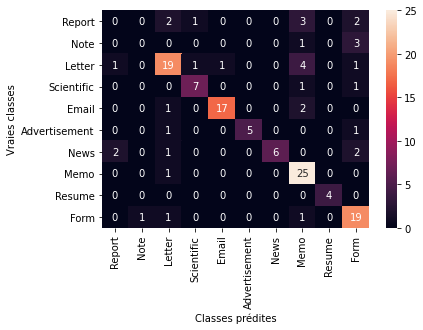

In [68]:
def training_models(X_train_tfidf, y_train, X_test_tfidf):
    '''
    Fonction pour entrainer les differents modèles et reporter les metriques.
    input: données d'entrainement et de test
    output: precision, rappel, f1-score, matrice de confusion de chaque classifier
    
    '''
    symbole1 = "<>"
    symbole2 = " "
    
    
    for key, classifier in classifiers.items():
        print(20*symbole1)
        print(symbole2*10 ,key)
        print(20*symbole1)

        # Entrainer du modèle
        classifier.fit(X_train_tfidf, y_train)
        
        # Prédiction sur les données de test
        y_pred = classifier.predict(X_test_tfidf)

        print(" les principales Metriques de classification:\n", classification_report(y_test, y_pred))
        
        # Matrice de confusion
        sns.heatmap(confusion_matrix(y_test, y_pred, labels = list(set(y_train))), 
                    annot=True, 
                    xticklabels=set(y_train),
                    yticklabels=set(y_train))
        
        plt.ylabel('Vraies classes')
        plt.xlabel('Classes prédites')
        plt.show()
        
training_models(X_train_tfidf, y_train, X_test_tfidf)

## Apprentissage avec racinisation

In [69]:
from sklearn.model_selection import train_test_split

# Diviser les donnees en 80% pour l'entrainement et 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text_nltk_and_stemming'], data['label'], test_size=0.2)
len(X_train), len(X_test)

(551, 138)

In [70]:
# transformation TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

<><><><><><><><><><><><><><><><><><><><>
           Naive Bayes
<><><><><><><><><><><><><><><><><><><><>
 les principales Metriques de classification:
                precision    recall  f1-score   support

Advertisement       0.00      0.00      0.00         7
        Email       0.89      0.96      0.92        25
         Form       0.73      0.35      0.47        23
       Letter       0.52      0.65      0.58        20
         Memo       0.37      0.93      0.53        29
         News       0.00      0.00      0.00         6
         Note       0.00      0.00      0.00         4
       Report       0.00      0.00      0.00         7
       Resume       0.00      0.00      0.00         4
   Scientific       1.00      0.15      0.27        13

     accuracy                           0.54       138
    macro avg       0.35      0.30      0.28       138
 weighted avg       0.53      0.54      0.47       138



/home/daj/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


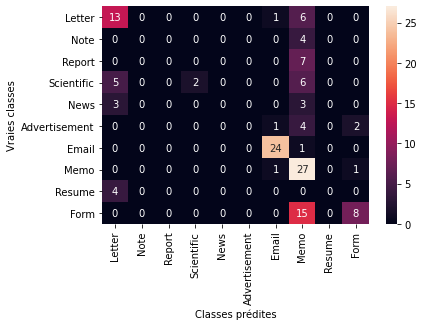

<><><><><><><><><><><><><><><><><><><><>
           Support Vector Machine
<><><><><><><><><><><><><><><><><><><><>
 les principales Metriques de classification:
                precision    recall  f1-score   support

Advertisement       1.00      0.29      0.44         7
        Email       0.83      1.00      0.91        25
         Form       0.64      0.70      0.67        23
       Letter       0.63      0.85      0.72        20
         Memo       0.83      0.83      0.83        29
         News       0.42      0.83      0.56         6
         Note       0.00      0.00      0.00         4
       Report       0.33      0.14      0.20         7
       Resume       1.00      1.00      1.00         4
   Scientific       0.80      0.31      0.44        13

     accuracy                           0.71       138
    macro avg       0.65      0.59      0.58       138
 weighted avg       0.71      0.71      0.68       138



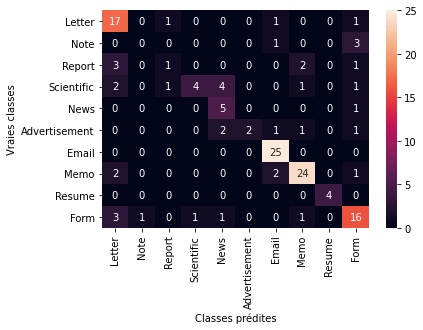

In [71]:
training_models(X_train_tfidf, y_train, X_test_tfidf)

## Commentaires:

Le classifier SVM est plus precis que le Naives Bayes dans les deux cas apres les etapes, respectivemente 74 % apres la lemmatization et 71% apres la racinisation. 

Mais les modèles prédisent bien dans tous les cas les features de la classe Email. Cette classe est dominante.

Avec la lematization la precision est plus elevée, elle est donc la procedure de pretraitement la mieux adaptée pour notre jeu de données.

# 7. Apprentissage profond (deep learning)

## Classification avec des réseaux de neurones

Les réseaux de neurones peuvent être entraînés pour apprendre à la fois la représentation vectorielle des mots (au lieu de tf-idf) et comment classer les documents. Le code ci-dessous vous permet d'entraîner un classificateur de texte neuronal à l'aide de l'intégration de mots à l'aide de Keras. La plupart du code est écrit, il suffit de définir l'architecture du réseau avec les bons paramètres avant de l'entraîner:

**<span style="color:red">To do</span>**:

> * Aller plus loin. Vérifiez [Text classification Keras examples](https://keras.io/examples/nlp/)

> * Définissez un réseau de neurones dans la fonction `get_model()` avec les paramètres suivants:
> * n'utiliser que les 10000 mots les plus fréquents dans les documents MAX_FEATURES
> * utiliser 1024 comme nombre maximal de mots dans les articles MAX_TEXT_LENGTH
> * utiliser une taille de 300 pour les embeddings EMBEDDING_SIZE: [word embeddings](https://keras.io/layers/embeddings/)
> * utiliser d'autres valeurs pour les ngram_filters filtres convolutifs: [couche convolutive 1D](https://keras.io/layers/convolutional/#conv1d)
> * Ajoutez une couche Dropout à l'endroit indiqué avec le valeur 0,2 [Dropout](https://keras.io/api/layers/regularization_layers/dropout/)
> * Former le modèle.

> * Comment ce réseau de neurones se compare-t-il aux autres modèles? 
> * Quelle est la performance?
> * Qu'apporte le changement de paramètres dans la performance?
> * Utilisez des plongements pré-entraînés et chargez-les en tant que poids dans ce modèle (au lieu de ceux générés aléatoirement)

In [118]:
import ast
import os
from nn_utils import TrainingHistory
from tensorflow.keras.layers import Dense, Embedding, Input
from tensorflow.keras.layers import GRU, Dropout, MaxPooling1D, Conv1D, Flatten, GlobalMaxPooling1D
from tensorflow.keras.models import Model
import numpy as np
import itertools
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import (classification_report, 
                             precision_recall_fscore_support, 
                             accuracy_score)

from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.layers import Concatenate

import tensorflow as tf

Configurez les paramètres du modèle.

In [133]:
MAX_FEATURES = 10000
MAX_TEXT_LENGTH = 1024
EMBEDDING_SIZE  = 300
BATCH_SIZE = 16
EPOCHS = 10
VALIDATION_SPLIT = 0.1

Cette methode transforme chaque texte des textes en une séquence d'entiers [Plus d'info](https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do). Donc, il prend chaque mot dans le texte et le remplace par sa valeur entière correspondante du dictionnaire [word_index](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer). Le dictionnaire a été obtenu à partir de [fit_on_texts](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer).


In [134]:
def get_train_test(train_raw_text, test_raw_text):
    
    tokenizer = text.Tokenizer(num_words=MAX_FEATURES)

    tokenizer.fit_on_texts(list(train_raw_text))
    
    train_tokenized = tokenizer.texts_to_sequences(train_raw_text)
    test_tokenized = tokenizer.texts_to_sequences(test_raw_text)
    
    return sequence.pad_sequences(train_tokenized, maxlen=MAX_TEXT_LENGTH), \
           sequence.pad_sequences(test_tokenized, maxlen=MAX_TEXT_LENGTH)

In [135]:
# Obtenez la liste des différentes classes
CLASSES_LIST = np.unique(data['label'])
n_out = len(CLASSES_LIST)

print(CLASSES_LIST, n_out)

['Advertisement' 'Email' 'Form' 'Letter' 'Memo' 'News' 'Note' 'Report'
 'Resume' 'Scientific'] 10


In [136]:
def get_model():

    inputs = Input(shape=(MAX_TEXT_LENGTH,))
    model = Embedding(MAX_FEATURES, EMBEDDING_SIZE)(inputs)
    # YOUR CODE HERE couche Dropout
    model = Dropout(0.2)(model)
    
    ngram_filters = [1, 2, 3] # YOUR CODE HERE Modifier les valeurs n-gramme
    filters = [300]*3

    convs = []
    for kernel_size, filter_length in zip(ngram_filters, filters):
        conv = Conv1D(filters=filter_length,
                      kernel_size=kernel_size,
                      padding='same',
                      activation='relu')(model)
    
        convs.append(conv)

    model = Concatenate()(convs)
    model = GlobalMaxPooling1D()(model)    

    outputs = Dense(n_out, activation="softmax")(model)
    model = Model(inputs=inputs, outputs=outputs)
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

Cette méthode est pour entraîner et tester le modèle.

In [137]:
def train_fit_predict(model, X_train, X_test, y, history):
    
    model.fit(X_train, y,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS, verbose=1,
              validation_split=VALIDATION_SPLIT)

    return model.predict(X_test)

Pour que le modèle comprenne les étiquettes, elles doivent être sous forme entière. Ainsi, pour cela, il existe cette méthode: [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [138]:
# Convertir la chaîne de classe en index (entiers)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(CLASSES_LIST)

y_train_encoded = le.transform(y_train) 
y_test_encoded = le.transform(y_test) 
train_y_cat = to_categorical(y_train_encoded, n_out)

In [139]:
y_train_encoded[:5]

array([3, 1, 3, 3, 1])

In [140]:
train_y_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [141]:
# obtenir les données textuelles dans le format correct pour le réseau neuronal
x_vec_train, x_vec_test = get_train_test(X_train, X_test)
len(x_vec_train), len(x_vec_test)

(551, 138)

In [142]:
# définir la topologie du réseau neuronal
model = get_model()

# Définir la procédure d'entrainement
history = TrainingHistory(x_vec_test, y_test_encoded, CLASSES_LIST)

# Train and predict
y_predicted = train_fit_predict(model, x_vec_train, x_vec_test, train_y_cat, history).argmax(1)


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1024)]       0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 1024, 300)    3000000     input_5[0][0]                    
__________________________________________________________________________________________________
dropout_4 (Dropout)             (None, 1024, 300)    0           embedding_4[0][0]                
__________________________________________________________________________________________________
conv1d_12 (Conv1D)              (None, 1024, 300)    90300       dropout_4[0][0]                  
____________________________________________________________________________________________

In [143]:
print(classification_report(y_test_encoded, y_predicted, target_names=CLASSES_LIST))

               precision    recall  f1-score   support

Advertisement       1.00      0.33      0.50         6
        Email       0.83      0.96      0.89        25
         Form       0.65      0.85      0.74        20
       Letter       0.76      0.95      0.84        20
         Memo       0.95      0.95      0.95        20
         News       0.71      0.71      0.71         7
         Note       0.62      0.50      0.56        10
       Report       0.75      0.46      0.57        13
       Resume       0.80      0.80      0.80         5
   Scientific       0.62      0.42      0.50        12

     accuracy                           0.77       138
    macro avg       0.77      0.69      0.71       138
 weighted avg       0.77      0.77      0.75       138



## Commentaires:

Les reseaux de neurones arrivent à bien classer les features. On remarque que tous les scores F1 sont superieurs à 50%. Les Resumes, les emails  et les Memo font parti des classes dominantes avec des f1-scores > 80% . Le modèle se trompe presque pas avec ces classes.

La précision du modèle est de 77% ce qui depasse largement les autres classifiers comme le Naive Bayes et le SVM. Le modèle est assez performant. C'est notre meilleure modèle.

En changeant les paramètres cela affecte le resultat mais la performance du modèle en gererale reste superieure à celle des autres classifieurs. On peut donc deduire que les reseaux de neurones sont les mieux adaptés à notre problème de classification de textes.

et voilà !